In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
cn = '196Rn'
bf = 0.53
ch = 'xn'
sigr = 2.5
# bf_diff = 0.01

proj_ship = '52Cr'
trg_ship = '144Sm'

df10_mb_ship = pd.read_csv('data/' + proj_ship + '_' + trg_ship + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb_ship = pd.read_csv('data/' + proj_ship + '_' + trg_ship + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')



In [19]:
e_lab = [232, 248]
exp_data = [ [0, 50], [120, 0],]

In [20]:
dfm10_mb_ship = df10_mb_ship.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb_ship = df0_mb_ship.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10_ship = dfm10_mb_ship
dfm0_ship = dfm0_mb_ship
df10_ship = df10_mb_ship
df0_ship = df0_mb_ship

mb = 1
ub = 1e3
nb = 1e6
pb = 1e9

scale = pb

dfm10_ship['CS'] = dfm10_mb_ship['CS']*scale
dfm0_ship['CS'] = dfm0_mb_ship['CS']*scale
df10_ship.iloc[:,2:] = df10_mb_ship.iloc[:,2:] * scale
df0_ship.iloc[:,2:] = df0_mb_ship.iloc[:,2:] * scale

# try:
#     exp = exp * scale
# except NameError:
#     print('No exp. values')

/tmp/ipykernel_124475/1738931321.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm10_ship[dfm10_ship['isotope'].isin(list(df10_ship.columns[8:10]))], palette=colors)
/tmp/ipykernel_124475/1738931321.py:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm0_ship[dfm0_ship['isotope'].isin(list(df0_ship.columns[8:10]))], palette=colors, ls=':', legend=False)


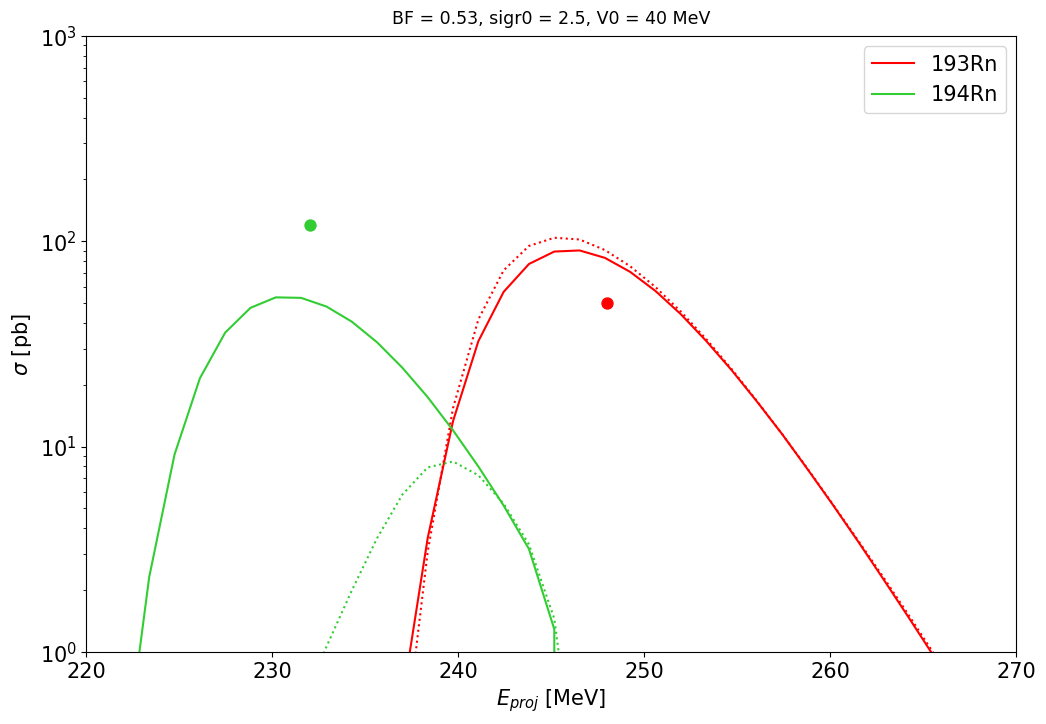

In [21]:
plt.rcParams.update({'font.size': 15})

colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']

# frame = 'E*/MeV'
frame = 'E_lab'

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm10_ship[dfm10_ship['isotope'].isin(list(df10_ship.columns[8:10]))], palette=colors)
sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm0_ship[dfm0_ship['isotope'].isin(list(df0_ship.columns[8:10]))], palette=colors, ls=':', legend=False)

plt.semilogy()
plt.ylim(1e0, 1e3)
if frame == 'E_lab':
    plt.xlabel('$E_{proj}$ [MeV]')
    plt.xlim(220, 270)
elif frame == 'E*/MeV':
    plt.xlabel('$E*$ [MeV]')
    plt.xlim(30, 65)
# plt.suptitle('CN: ' + cn + '*, ' + proj_ship + ' + ' + trg_ship + ' vs. ' + proj_ritu + ' + ' + trg_ritu)# + '; BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr))#, va='top')
# plt.title('BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr) + ', V0 = 40 MeV', va='bottom', fontsize='small')
plt.title('BF = ' + str(bf) + ', sigr0 = ' + str(sigr) + ', V0 = 40 MeV', va='bottom', fontsize='small')
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
elif scale == pb:
    plt.ylabel('$\sigma$ [pb]')
plt.legend(loc='upper right')

for i in range(len(exp_data)):
    plt.scatter(e_lab, exp_data[i], marker='.',  color=colors[i], s=250)
    
    
# exp_ship_192at = 40*1e-6*scale
# exp_ship_193at = 13*1e-6*scale
# exp_ritu = 300*1e-9*scale

# label_192at = '51V+144Sm->192At+3n SHIP'
# label_193at = '51V+144Sm->193At+2n SHIP'
# label_ritu = '54Fe+141Pr->191At+4n RITU'
# new_labels = [label_192at, label_193at, label_ritu]

# h, l = ax.get_legend_handles_labels()
# ax.legend(handles=h,labels=new_labels, loc='upper right')
        
# if frame == 'E*/MeV':
#     dfm_frame = 1
#     E_exp_ship = 39
#     E_exp_ritu = 49
#     en_frame = 'Eexc'
# elif frame == 'E_lab':
#     dfm_frame = 0
#     E_exp_ship = 230
#     E_exp_ritu = 260
#     en_frame = 'Elab'

# (_, caps_ship_192at, _) = plt.errorbar(E_exp_ship, exp_ship_192at, yerr=exp_ship_192at*0.25, marker='.', capsize=5, color=colors[0], ls='none', markersize=10)
# (_, caps_ship_193at, _) = plt.errorbar(E_exp_ship, exp_ship_193at, yerr=exp_ship_193at*0., marker='.', capsize=5, color=colors[1], ls='none', markersize=10)
# (_, caps_ritu, _) = plt.errorbar(E_exp_ritu, exp_ritu, yerr=0, marker='.', capsize=5, color=colors[2], ls='none', markersize=10)

# alpha_value = 0.1

# for i in range(plot_from_ship, plot_from_ship+2):
#     plt.fill_between(df10_ship.iloc[:, dfm_frame],  df10_ship.iloc[:, i], bf_low_10_ship.iloc[:, i], color=colors[i-plot_from_ship], alpha = alpha_value)
#     plt.fill_between(df10_ship.iloc[:, dfm_frame],  df10_ship.iloc[:, i], bf_high_10_ship.iloc[:, i], color=colors[i-plot_from_ship], alpha = alpha_value)
#     # plt.fill_between(df0_ship.iloc[:, 0],  df0_ship.iloc[:, i], bf_low_0_ship.iloc[:, i], color=colors[i-plot_from], alpha = alpha_value)
#     # plt.fill_between(df0_ship.iloc[:, 0],  df0_ship.iloc[:, i], bf_high_0_ship.iloc[:, i], color=colors[i-plot_from], alpha = alpha_value)
    
# for i in range(plot_from_ritu, plot_from_ritu+1):
#     plt.fill_between(df10_ritu.iloc[:, dfm_frame],  df10_ritu.iloc[:, i], bf_low_10_ritu.iloc[:, i], color=colors[2], alpha = alpha_value)
#     plt.fill_between(df10_ritu.iloc[:, dfm_frame],  df10_ritu.iloc[:, i], bf_high_10_ritu.iloc[:, i], color=colors[2], alpha = alpha_value)
    
# for cap in caps_ship_192at:
#     cap.set_markeredgewidth(1)
# for cap in caps_ship_193at:
#     cap.set_markeredgewidth(1)
# for cap in caps_ritu:
#     cap.set_markeredgewidth(1)
    

# plt.savefig('195At_SHIP_vs_RITU' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '_' + en_frame + '.png')
# plt.savefig('195At_SHIP_vs_RITU' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '_' + en_frame + '.pdf')